# Model Building

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [25]:
test_datagen = ImageDataGenerator(rescale = 1/255)

In [26]:
x_train = train_datagen.flow_from_directory('./D1/train', target_size = (64,64), batch_size = 32, class_mode = 'categorical')

Found 43622 images belonging to 300 classes.


In [27]:
x_test = test_datagen.flow_from_directory('./D1/test', target_size = (64,64), batch_size = 32, class_mode = 'categorical')

Found 1500 images belonging to 300 classes.


In [8]:
x_train.class_indices

{'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALD IBIS': 17,
 'BALI STARLING': 18,
 'BALTIMORE ORIOLE': 19,
 'BANANAQUIT': 20,
 'BANDED BROADBILL': 21,
 'BANDED PITA': 22,
 'BAR-TAILED GODWIT': 23,
 'BARN OWL': 24,
 'BARN SWALLOW': 25,
 'BARRED PUFFBIRD': 26,
 'BAY-BREASTED WARBLER': 27,
 'BEARDED BARBET': 28,
 'BEARDED BELLBIRD': 29,
 'BEARDED REEDLING': 30,
 'BELTED KINGFISHER': 31,
 'BIRD OF PARADISE': 32,
 'BLACK & YELLOW bROADBILL': 33,
 'BLACK FRANCOLIN': 34,
 'BLACK SKIMMER': 35,
 'BLACK SWAN': 36,
 'BLACK TAIL CRAKE': 37,
 'BLACK THROATED BUSHTIT': 38,
 'BLACK THROATED WARBLER': 39,
 'BLACK VULTURE': 40,
 'BLACK-CAPPED CHICKADEE': 41,

In [9]:
model = Sequential()

In [10]:
model.add(Convolution2D(32, (3,3), input_shape = (64, 64, 3))) # 3 indicated coloured image

In [11]:
model.add(MaxPooling2D((2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units = 128, kernel_initializer = 'random_uniform', activation = 'relu'))

In [14]:
model.add(Dense(units = 300, kernel_initializer = 'random_uniform', activation = 'relu'))

In [15]:
model.add(Dense(units = 300, kernel_initializer = 'random_uniform', activation = 'softmax'))

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
43622 // 32

1363

In [18]:
1500 // 32

46

In [19]:
model.fit_generator(x_train, steps_per_epoch = 1363, epochs = 5, validation_data = x_test, validation_steps = 46)

F:\AnacondaFiles\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1363/1363 [==============================] - 306s 224ms/step - loss: 4.5450 - accuracy: 0.0898 - val_loss: 3.5732 - val_accuracy: 0.2018
Epoch 2/5
1363/1363 [==============================] - 151s 111ms/step - loss: 3.5903 - accuracy: 0.2148 - val_loss: 3.1107 - val_accuracy: 0.2853 - loss: 3.6511 - accuracy - ETA: 1:06 - los - ETA: 1: - ETA: 1:02 - loss: 3.6453 - accu - ETA: 1:01 - l
Epoch 3/5
1363/1363 [==============================] - 154s 113ms/step - loss: 3.1883 - accuracy: 0.2806 - val_loss: 2.9001 - val_accuracy: 0.3349
Epoch 4/5
1363/1363 [==============================] - 149s 109ms/step - loss: 2.9332 - accuracy: 0.3272 - val_loss: 2.8419 - val_accuracy: 0.3648
Epoch 5/5
1363/1363 [==============================] - 147s 108ms/step - loss: 2.7372 - accuracy: 0.3601 - val_loss: 2.8954 - val_accuracy: 0.3471


In [74]:
dir

<function dir>

# Model Testing

In [54]:
from tensorflow.keras.models import load_model

In [55]:
from tensorflow.keras.preprocessing import image

In [56]:
model = load_model('D:/DOWNLOADS/DOWNLOADS Brave/Birdy/Model/Notebook/birdModel.h5')

In [57]:
img = image.load_img('D:/DOWNLOADS/DOWNLOADS Brave/Birdy/Model/Notebook/002.jpg', target_size = (64,64))

In [58]:
type(img)

PIL.Image.Image

In [59]:
x = image.img_to_array(img)

In [60]:
type(x)

numpy.ndarray

In [61]:
import matplotlib.pyplot as plt

In [62]:
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


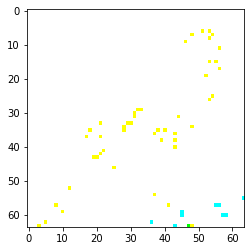

In [63]:
plt.imshow(x)

In [64]:
import cv2

In [65]:
cv2.imshow('abc', x)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:
x = np.expand_dims(x, axis = 0)

In [67]:
pred = np.argmax(model.predict(x))

In [68]:
pred

7

In [69]:
x_train

In [70]:
x_train[pred]

(array([[[[0.3608808 , 0.39244625, 0.3021537 ],
          [0.3399878 , 0.3540299 , 0.27076596],
          [0.31239837, 0.33037722, 0.2946303 ],
          ...,
          [0.17818354, 0.19233727, 0.14509805],
          [0.16158633, 0.17335103, 0.14040396],
          [0.14917056, 0.16337876, 0.13348429]],
 
         [[0.36187267, 0.39401394, 0.30183783],
          [0.34033647, 0.35515785, 0.27049577],
          [0.31295875, 0.33119857, 0.29478   ],
          ...,
          [0.17818354, 0.19233727, 0.14509805],
          [0.16158633, 0.17335103, 0.14040396],
          [0.14917056, 0.16337876, 0.13348429]],
 
         [[0.390674  , 0.4386311 , 0.29235128],
          [0.35131034, 0.38895953, 0.26117745],
          [0.3267405 , 0.35312784, 0.29479843],
          ...,
          [0.16936997, 0.1881034 , 0.13792631],
          [0.14918034, 0.16094504, 0.12049458],
          [0.16507088, 0.17694584, 0.14189538]],
 
         ...,
 
         [[0.34964526, 0.36529386, 0.40001494],
          [0.32392

In [71]:
d = {'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALD IBIS': 17,
 'BALI STARLING': 18,
 'BALTIMORE ORIOLE': 19,
 'BANANAQUIT': 20,
 'BANDED BROADBILL': 21,
 'BANDED PITA': 22,
 'BAR-TAILED GODWIT': 23,
 'BARN OWL': 24,
 'BARN SWALLOW': 25,
 'BARRED PUFFBIRD': 26,
 'BAY-BREASTED WARBLER': 27,
 'BEARDED BARBET': 28,
 'BEARDED BELLBIRD': 29,
 'BEARDED REEDLING': 30,
 'BELTED KINGFISHER': 31,
 'BIRD OF PARADISE': 32,
 'BLACK & YELLOW bROADBILL': 33,
 'BLACK FRANCOLIN': 34,
 'BLACK SKIMMER': 35,
 'BLACK SWAN': 36,
 'BLACK TAIL CRAKE': 37,
 'BLACK THROATED BUSHTIT': 38,
 'BLACK THROATED WARBLER': 39,
 'BLACK VULTURE': 40,
 'BLACK-CAPPED CHICKADEE': 41,
 'BLACK-NECKED GREBE': 42,
 'BLACK-THROATED SPARROW': 43,
 'BLACKBURNIAM WARBLER': 44,
 'BLONDE CRESTED WOODPECKER': 45,
 'BLUE GROUSE': 46,
 'BLUE HERON': 47,
 'BOBOLINK': 48,
 'BORNEAN BRISTLEHEAD': 49,
 'BORNEAN LEAFBIRD': 50,
 'BORNEAN PHEASANT': 51,
 'BROWN CREPPER': 52,
 'BROWN NOODY': 53,
 'BROWN THRASHER': 54,
 'BULWERS PHEASANT': 55,
 'CACTUS WREN': 56,
 'CALIFORNIA CONDOR': 57,
 'CALIFORNIA GULL': 58,
 'CALIFORNIA QUAIL': 59,
 'CANARY': 60,
 'CAPE MAY WARBLER': 61,
 'CAPPED HERON': 62,
 'CAPUCHINBIRD': 63,
 'CARMINE BEE-EATER': 64,
 'CASPIAN TERN': 65,
 'CASSOWARY': 66,
 'CEDAR WAXWING': 67,
 'CERULEAN WARBLER': 68,
 'CHARA DE COLLAR': 69,
 'CHIPPING SPARROW': 70,
 'CHUKAR PARTRIDGE': 71,
 'CINNAMON TEAL': 72,
 'CLARKS NUTCRACKER': 73,
 'COCK OF THE  ROCK': 74,
 'COCKATOO': 75,
 'COLLARED ARACARI': 76,
 'COMMON FIRECREST': 77,
 'COMMON GRACKLE': 78,
 'COMMON HOUSE MARTIN': 79,
 'COMMON LOON': 80,
 'COMMON POORWILL': 81,
 'COMMON STARLING': 82,
 'COUCHS KINGBIRD': 83,
 'CRESTED AUKLET': 84,
 'CRESTED CARACARA': 85,
 'CRESTED NUTHATCH': 86,
 'CRIMSON SUNBIRD': 87,
 'CROW': 88,
 'CROWNED PIGEON': 89,
 'CUBAN TODY': 90,
 'CUBAN TROGON': 91,
 'CURL CRESTED ARACURI': 92,
 'D-ARNAUDS BARBET': 93,
 'DARK EYED JUNCO': 94,
 'DOUBLE BARRED FINCH': 95,
 'DOUBLE BRESTED CORMARANT': 96,
 'DOWNY WOODPECKER': 97,
 'EASTERN BLUEBIRD': 98,
 'EASTERN MEADOWLARK': 99,
 'EASTERN ROSELLA': 100,
 'EASTERN TOWEE': 101,
 'ELEGANT TROGON': 102,
 'ELLIOTS  PHEASANT': 103,
 'EMPEROR PENGUIN': 104,
 'EMU': 105,
 'ENGGANO MYNA': 106,
 'EURASIAN GOLDEN ORIOLE': 107,
 'EURASIAN MAGPIE': 108,
 'EVENING GROSBEAK': 109,
 'FAIRY BLUEBIRD': 110,
 'FIRE TAILLED MYZORNIS': 111,
 'FLAME TANAGER': 112,
 'FLAMINGO': 113,
 'FRIGATE': 114,
 'GAMBELS QUAIL': 115,
 'GANG GANG COCKATOO': 116,
 'GILA WOODPECKER': 117,
 'GILDED FLICKER': 118,
 'GLOSSY IBIS': 119,
 'GO AWAY BIRD': 120,
 'GOLD WING WARBLER': 121,
 'GOLDEN CHEEKED WARBLER': 122,
 'GOLDEN CHLOROPHONIA': 123,
 'GOLDEN EAGLE': 124,
 'GOLDEN PHEASANT': 125,
 'GOLDEN PIPIT': 126,
 'GOULDIAN FINCH': 127,
 'GRAY CATBIRD': 128,
 'GRAY PARTRIDGE': 129,
 'GREAT POTOO': 130,
 'GREATOR SAGE GROUSE': 131,
 'GREEN BROADBILL': 132,
 'GREEN JAY': 133,
 'GREEN MAGPIE': 134,
 'GREY PLOVER': 135,
 'GUINEA TURACO': 136,
 'GUINEAFOWL': 137,
 'GYRFALCON': 138,
 'HARPY EAGLE': 139,
 'HAWAIIAN GOOSE': 140,
 'HELMET VANGA': 141,
 'HIMALAYAN MONAL': 142,
 'HOATZIN': 143,
 'HOODED MERGANSER': 144,
 'HOOPOES': 145,
 'HORNBILL': 146,
 'HORNED GUAN': 147,
 'HORNED LARK': 148,
 'HORNED SUNGEM': 149,
 'HOUSE FINCH': 150,
 'HOUSE SPARROW': 151,
 'IMPERIAL SHAQ': 152,
 'INCA TERN': 153,
 'INDIAN BUSTARD': 154,
 'INDIAN PITTA': 155,
 'INDIGO BUNTING': 156,
 'JABIRU': 157,
 'JAVA SPARROW': 158,
 'KAGU': 159,
 'KAKAPO': 160,
 'KILLDEAR': 161,
 'KING VULTURE': 162,
 'KIWI': 163,
 'KOOKABURRA': 164,
 'LARK BUNTING': 165,
 'LEARS MACAW': 166,
 'LILAC ROLLER': 167,
 'LONG-EARED OWL': 168,
 'MAGPIE GOOSE': 169,
 'MALABAR HORNBILL': 170,
 'MALACHITE KINGFISHER': 171,
 'MALAGASY WHITE EYE': 172,
 'MALEO': 173,
 'MALLARD DUCK': 174,
 'MANDRIN DUCK': 175,
 'MARABOU STORK': 176,
 'MASKED BOOBY': 177,
 'MASKED LAPWING': 178,
 'MIKADO  PHEASANT': 179,
 'MOURNING DOVE': 180,
 'MYNA': 181,
 'NICOBAR PIGEON': 182,
 'NOISY FRIARBIRD': 183,
 'NORTHERN BALD IBIS': 184,
 'NORTHERN CARDINAL': 185,
 'NORTHERN FLICKER': 186,
 'NORTHERN GANNET': 187,
 'NORTHERN GOSHAWK': 188,
 'NORTHERN JACANA': 189,
 'NORTHERN MOCKINGBIRD': 190,
 'NORTHERN PARULA': 191,
 'NORTHERN RED BISHOP': 192,
 'NORTHERN SHOVELER': 193,
 'OCELLATED TURKEY': 194,
 'OKINAWA RAIL': 195,
 'ORANGE BRESTED BUNTING': 196,
 'OSPREY': 197,
 'OSTRICH': 198,
 'OVENBIRD': 199,
 'OYSTER CATCHER': 200,
 'PAINTED BUNTIG': 201,
 'PALILA': 202,
 'PARADISE TANAGER': 203,
 'PARAKETT  AKULET': 204,
 'PARUS MAJOR': 205,
 'PEACOCK': 206,
 'PELICAN': 207,
 'PEREGRINE FALCON': 208,
 'PHILIPPINE EAGLE': 209,
 'PINK ROBIN': 210,
 'PUFFIN': 211,
 'PURPLE FINCH': 212,
 'PURPLE GALLINULE': 213,
 'PURPLE MARTIN': 214,
 'PURPLE SWAMPHEN': 215,
 'PYGMY KINGFISHER': 216,
 'QUETZAL': 217,
 'RAINBOW LORIKEET': 218,
 'RAZORBILL': 219,
 'RED BEARDED BEE EATER': 220,
 'RED BELLIED PITTA': 221,
 'RED BROWED FINCH': 222,
 'RED FACED CORMORANT': 223,
 'RED FACED WARBLER': 224,
 'RED HEADED DUCK': 225,
 'RED HEADED WOODPECKER': 226,
 'RED HONEY CREEPER': 227,
 'RED NAPED TROGON': 228,
 'RED TAILED HAWK': 229,
 'RED TAILED THRUSH': 230,
 'RED WINGED BLACKBIRD': 231,
 'RED WISKERED BULBUL': 232,
 'REGENT BOWERBIRD': 233,
 'RING-NECKED PHEASANT': 234,
 'ROADRUNNER': 235,
 'ROBIN': 236,
 'ROCK DOVE': 237,
 'ROSY FACED LOVEBIRD': 238,
 'ROUGH LEG BUZZARD': 239,
 'ROYAL FLYCATCHER': 240,
 'RUBY THROATED HUMMINGBIRD': 241,
 'RUDY KINGFISHER': 242,
 'RUFOUS KINGFISHER': 243,
 'RUFUOS MOTMOT': 244,
 'SAMATRAN THRUSH': 245,
 'SAND MARTIN': 246,
 'SANDHILL CRANE': 247,
 'SCARLET IBIS': 248,
 'SCARLET MACAW': 249,
 'SCARLET TANAGER': 250,
 'SHOEBILL': 251,
 'SHORT BILLED DOWITCHER': 252,
 'SMITHS LONGSPUR': 253,
 'SNOWY EGRET': 254,
 'SNOWY OWL': 255,
 'SORA': 256,
 'SPANGLED COTINGA': 257,
 'SPLENDID WREN': 258,
 'SPOON BILED SANDPIPER': 259,
 'SPOONBILL': 260,
 'SRI LANKA BLUE MAGPIE': 261,
 'STEAMER DUCK': 262,
 'STORK BILLED KINGFISHER': 263,
 'STRAWBERRY FINCH': 264,
 'STRIPPED MANAKIN': 265,
 'STRIPPED SWALLOW': 266,
 'SUPERB STARLING': 267,
 'SWINHOES PHEASANT': 268,
 'TAIWAN MAGPIE': 269,
 'TAKAHE': 270,
 'TASMANIAN HEN': 271,
 'TEAL DUCK': 272,
 'TIT MOUSE': 273,
 'TOUCHAN': 274,
 'TOWNSENDS WARBLER': 275,
 'TREE SWALLOW': 276,
 'TRUMPTER SWAN': 277,
 'TURKEY VULTURE': 278,
 'TURQUOISE MOTMOT': 279,
 'UMBRELLA BIRD': 280,
 'VARIED THRUSH': 281,
 'VENEZUELIAN TROUPIAL': 282,
 'VERMILION FLYCATHER': 283,
 'VICTORIA CROWNED PIGEON': 284,
 'VIOLET GREEN SWALLOW': 285,
 'VULTURINE GUINEAFOWL': 286,
 'WALL CREAPER': 287,
 'WATTLED CURASSOW': 288,
 'WHIMBREL': 289,
 'WHITE CHEEKED TURACO': 290,
 'WHITE NECKED RAVEN': 291,
 'WHITE TAILED TROPIC': 292,
 'WHITE THROATED BEE EATER': 293,
 'WILD TURKEY': 294,
 'WILSONS BIRD OF PARADISE': 295,
 'WOOD DUCK': 296,
 'YELLOW BELLIED FLOWERPECKER': 297,
 'YELLOW CACIQUE': 298,
 'YELLOW HEADED BLACKBIRD': 299}


In [72]:
d

{'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALD IBIS': 17,
 'BALI STARLING': 18,
 'BALTIMORE ORIOLE': 19,
 'BANANAQUIT': 20,
 'BANDED BROADBILL': 21,
 'BANDED PITA': 22,
 'BAR-TAILED GODWIT': 23,
 'BARN OWL': 24,
 'BARN SWALLOW': 25,
 'BARRED PUFFBIRD': 26,
 'BAY-BREASTED WARBLER': 27,
 'BEARDED BARBET': 28,
 'BEARDED BELLBIRD': 29,
 'BEARDED REEDLING': 30,
 'BELTED KINGFISHER': 31,
 'BIRD OF PARADISE': 32,
 'BLACK & YELLOW bROADBILL': 33,
 'BLACK FRANCOLIN': 34,
 'BLACK SKIMMER': 35,
 'BLACK SWAN': 36,
 'BLACK TAIL CRAKE': 37,
 'BLACK THROATED BUSHTIT': 38,
 'BLACK THROATED WARBLER': 39,
 'BLACK VULTURE': 40,
 'BLACK-CAPPED CHICKADEE': 41,

In [73]:
print(list(d.items())[pred])

('AMERICAN GOLDFINCH', 7)
